<a href="https://colab.research.google.com/github/rsbatistajuliana/dio-datascience-pandas/blob/main/bootcamp_dio_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trabalhando com pandas + excel

Quero saber: como estão as vendas em cada cidade??

In [5]:
#importando pandas
import pandas as pd

In [6]:
#Leituras dos arquivos de upload: esses arquivos são temporários
df1 = pd.read_excel("Aracaju.xlsx") #possui varios parametros, da pra ler uma aba especifica...
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [7]:
#juntando todas as planilhas
df = pd.concat([df1,df2,df3,df4,df5])#um arquivo abaixo do outro

In [8]:
#Exibindo head
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
#exibindo 5 ultimas linhas 
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
#pegar uma amostra dos dados - aleatorio
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
14,Fortaleza,2019-01-12,132.68,1005,1
154,Salvador,2019-01-02,9.58,1037,1
200,Natal,2019-01-02,41.06,1035,1
74,Fortaleza,2019-01-01,163.09,1005,5
129,Recife,2019-03-02,35.34,982,7


In [11]:
#verificando o tipo de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
#alterando o tipo de dado de LojaID
#Não vamos fazer cálculo, entao passamos para string - opcional
df["LojaID"] = df["LojaID"].astype("object")

### Valores faltantes

In [13]:
#Verifica as celulas null, e retorna a quantidade
df.isnull().sum()
#podemos substituir por zero, pela média de vendas, deletar as linhas

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo pela média
#df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) # inplace modifica na memória 
#df["Vendas"].mean()

## Tratamentos que podem ser necessários de serem realizados

In [15]:
#Substituindo por zero
#df["Vendas"].fillna(0, inplace=True) # inplace modifica na memória 


In [16]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
#df.dropna(subset=["vendas"], inplace=True)

In [17]:
#Remover linhas que estejam com valores faltantes em todas as colunas 
#df.dropna(how="all", inplace=True)


In [18]:
#Criando novas colunas
#receita - o dados de interesse final - multiplica venda e qntd
df["Receita"] = df["Vendas"].mul(df["Qtde"])


In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
#Temos a receita mas queremos a qnt
df["Receita/Venda"] = df["Receita"]/df["Vendas"]

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [22]:
#maior receita
df["Receita"].max()

3544.0

In [23]:
#Menor Receita
df["Receita"].min()

3.34

In [24]:
#nlargest -  Top 3/maiores com base na Receita
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [25]:
#nsmallest - as 3 piores/menores com base na receita
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [27]:
df["LojaID"].unique() #quantidade de lojas em questão

array([1520, 1522, 1521, 1523, 1002, 1004, 1003, 1005, 981, 982, 983, 980,
       853, 852, 854, 1036, 1035, 1037, 1034], dtype=object)

In [26]:
#Agrupamento por cidade - soma das receitas
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
## Quantas lojas existem em cada cidade?
df.groupby("Cidade")["LojaID"].nunique() #contagem distinta

Cidade
Aracaju      4
Fortaleza    8
Natal        7
Recife       4
Salvador     4
Name: LojaID, dtype: int64

Temdo em vista a soma das receitas por cidade e que a quantidade de lojas de Aracajú e Salvador é igual, observa-se que Salvador possui menor receita e Aracajú a maior. E que Fortaleza, mesmo tendo o dobro de lojas que Aracajú, sua Receita foi inferior


In [ ]:
#Ordenando o conjunto de dados - 10 maiores receitas
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### Trabalhando com datas

In [ ]:
#Tranformando a coluna de data em tipo inteiro( antes era datetime64[ns])
df["Data"] = df["Data"].astype("int64")
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Cidade            object
Data               int64
Vendas           float64
LojaID            object
Qtde               int64
Receita          float64
Receita/Venda    float64
dtype: object

In [ ]:
#Transformando coluna data de inteiro para data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                   object
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [ ]:
#Agrupamento por ano - receita anual
#vai na data e extrai apenas o ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda
99,Aracaju,2018-01-01,139.32,1521,3,417.96,3.0,2018
36,Aracaju,2018-01-01,37.99,1523,8,303.92,8.0,2018
74,Recife,2019-01-01,38.79,983,6,232.74,6.0,2019
21,Natal,2019-02-08,679.00,853,2,1358.00,2.0,2019
113,Aracaju,2018-01-01,23.05,1521,9,207.45,9.0,2018


In [ ]:
#Extraindo o mês e o dia - criou 2 colunas na mesma linha de código
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda
142,Natal,2019-01-02,7.12,1034,1,7.12,1.0,2019,1,2
92,Aracaju,2018-01-01,37.46,1520,7,262.22,7.0,2018,1,1
133,Natal,2019-01-02,153.71,1035,1,153.71,1.0,2019,1,2
175,Salvador,2019-01-02,16.53,1036,2,33.06,2.0,2019,1,2
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2


In [ ]:
#como ver a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["Diferença_dias"]= df["Data"] - df["Data"].min()
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,Diferença_dias
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1,365 days
71,Fortaleza,2019-01-01,41.89,1004,4,167.56,4.0,2019,1,1,365 days
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days
205,Natal,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days
64,Natal,2019-02-22,704.00,853,4,2816.00,4.0,2019,2,22,417 days
160,Salvador,2019-01-02,11.76,1034,1,11.76,1.0,2019,1,2,366 days


In [ ]:
#Criando a coluna de trimestre
df["Trimestre_vendas"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,Diferença_dias,Trimestre_vendas
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2,425 days,1
76,Salvador,2019-01-01,39.51,1035,3,118.53,3.0,2019,1,1,365 days,1
91,Recife,2019-01-01,150.58,982,6,903.48,6.0,2019,1,1,365 days,1
70,Recife,2019-01-01,20.40,983,7,142.80,7.0,2019,1,1,365 days,1
122,Aracaju,2018-01-01,38.49,1522,4,153.96,4.0,2018,1,1,0 days,1


In [ ]:
df["Trimestre_vendas"].unique()

array([1, 3, 4, 2])

In [ ]:
df["Data"].month

In [ ]:
#Filtrando as vendas de 2019 do meês de março
#Quando se tratar de data usar DT cuidado para não confundir com dataframe DF.

vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19#salvou em uma variável as vendas de marco de 2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,Diferença_dias,Trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19["Receita"].sum()

63415.01000000001

# Visualização de dados


In [ ]:
df["LojaID"].value_counts(ascending=False)
#retorna do maior par o menor, verifica quantas linhas tem para cada loja.
#O que pra gente significa quantas vendas foi feita por aquela loja, da mais citada para a menos.

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

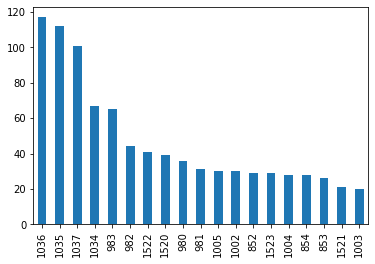

In [ ]:
#Criar um grafico desse resultado basta acrescentar:
df["LojaID"].value_counts(ascending=False).plot.bar() #barras verticais


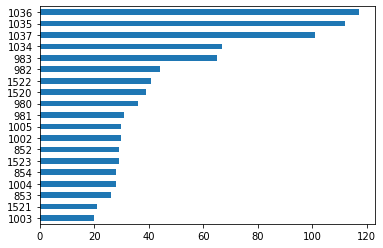

In [ ]:
#Barras horizontais - ordenado o ; tira linha de infos
df["LojaID"].value_counts(ascending=True).plot.barh();

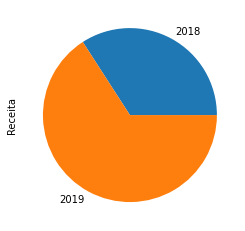

In [ ]:
#Gráfico de pizza
#Agrupamento de receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [ ]:
#Grafico ocm título e eixos nomeados
import matplotlib.pyplot as plt

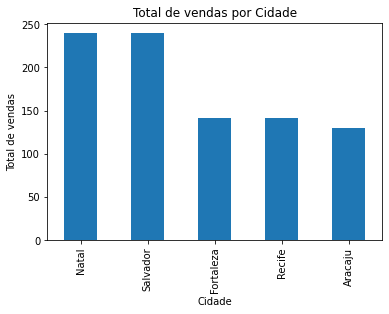

In [ ]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

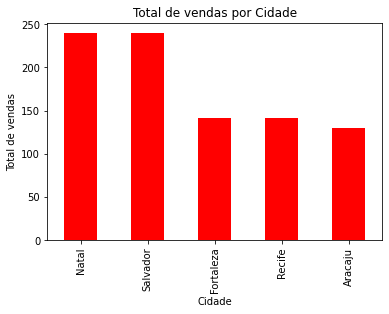

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

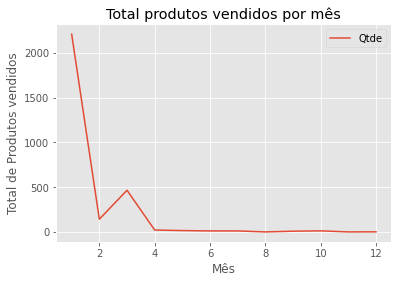

In [ ]:
#Alterando estilo - .plot() grafico de linhas
plt.style.use("ggplot")
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Das vendas por mes, valos selecionar apenas ano de 2019
df_2019 = df[df["Ano_venda"] == 2019]
#criou uma variável, passou a coluna de df com ano_venda == 2019

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

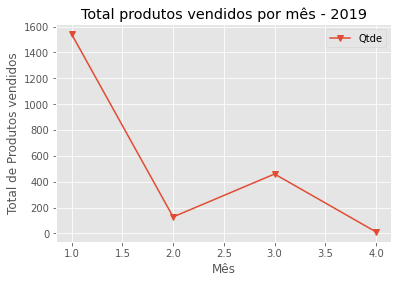

In [ ]:
#Total de produtos vendidos por mês - 2019
#peguei o df de 2019 e peguei os meses e qnts
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês - 2019",marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend();

In [ ]:
df_2018 = df[df["Ano_venda"] == 2018]

In [ ]:
df_2018.groupby(df_2018["mes_venda"])["Qtde"].sum()

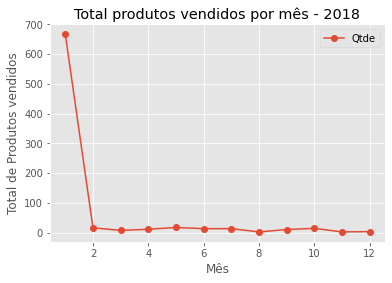

In [ ]:
df_2018.groupby(df_2018["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês - 2018",marker="o")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend();

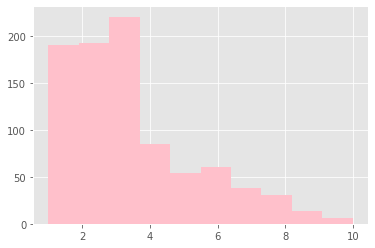

In [ ]:
#Histograma
plt.hist(df["Qtde"],color="pink");

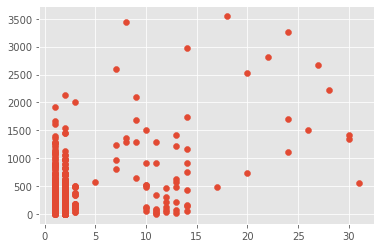

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"],y=df_2019["Receita"]);

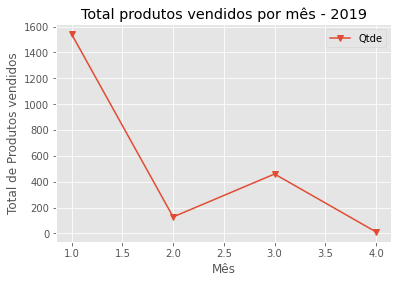

In [ ]:
#Salvar em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês - 2019",marker="v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend()
plt.savefig("Grafico_QTDExMES.png")